# Random Forests

Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both. Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable. <br/><br/>

The decision tree method that we worked with during the previous session represents a powerful approach for moving beyond the consideration of linear relationships among variables into a context of prediction based on exploring how many variables can predict a particular target or response.  <br/><br/>

As we have seen, an advantage of decision trees is that they're easy to interpret and visualize and can potentially uncover patterns in our data that can not be easily identified through traditional regression methods.  <br/><br/>

However, we've also shown that small changes in the data can lead to different results. And we've explained, that while easy to interpret, decision trees are not very reproducible on future data. Often making them less useful, as reliable prediction models, and more suitable for exploratory data analysis and interpretation. In this session, we'll review a related machine learning method, known as Random Forests. This data mining algorithm is based on decision trees, but proceeds by growing many trees, that is a decision tree forest. In ways, directly address the problem of model reproducability.  <br/><br/>

Like decision trees, Random Forests allow us to make binary splits in our data that creates segmentations or sub groups. By applying a series of simple rules or criteria over and over again, which choose variables that best predict our target variable. While decision trees proceed by searching for a split on every variable in every node, Random Forests searches for a split on only one variable in a node. The variable that has the largest association with the Target among candidate explanatory variables but only among those explanatory variables that have been randomly selected to be tested for that node. That is, First, a small subset of explanatory variables is selected at random. Next the node is split with the BEST variable among the small number of randomly selected variables. Not the best variable of all the variables, as is true when we are interested in creating only single decision tree. Once the best variable from the eligible random subset of variables is used to split the node in question. A new list of eligible explanatory variables is selected on random to split on the next node. This continues until the tree is fully grown, and Ideally there is one observation in each terminal mode. Uniquely explained by all of the decisions that came before it. With a large number of explanatory variables, the Eligible variables set will be quite different from node to node. However, Important variables will eventually make it into the tree. And Their relative success in predicting the target variable will begin to get them larger and larger numbers of "votes" in their favor. The growing of each tree in a random forest is not only based on subsets of explanatory variables at each node. But also based on A random subset of the sample for each tree in the forest. This process of selecting a random sample of observations is known as Bagging.  <br/><br/>

Importantly, each tree is growing on a different randomly selected sample of Bagged data with the remaining Out of Bag data available to test the accuracy of each tree. For each tree, the Bagging Process selects about 60% of the original sample, while the resulting tree is tested against the remaining 40% of the sample. Thus, the randomly selected bag data and out of bag data, will be a different 60% and 40% of observations for each tree. Finally, before we start to grow our first random forest, I want to mention the most important thing to know when interrupting the results of random forests is that the trees generated are not themselves interpreted. Instead, They are used to collectively rank the importance of variables in predicting our target of interest.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets

E:\Python\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.getcwd()

'C:\\Users\\praveen\\DS_Notebooks\\coursera\\machine-learning-data-analysis'

# Data Engineering and Analysis

In [3]:
data = pd.read_csv("tree_addhealth.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 25 columns):
BIO_SEX      6503 non-null float64
HISPANIC     6481 non-null float64
WHITE        6485 non-null float64
BLACK        6485 non-null float64
NAMERICAN    6485 non-null float64
ASIAN        6485 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(20), int64(5

In [5]:
data_clean = data.dropna()

In [6]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 1 to 6502
Data columns (total 25 columns):
BIO_SEX      4575 non-null float64
HISPANIC     4575 non-null float64
WHITE        4575 non-null float64
BLACK        4575 non-null float64
NAMERICAN    4575 non-null float64
ASIAN        4575 non-null float64
age          4575 non-null float64
TREG1        4575 non-null float64
ALCEVR1      4575 non-null float64
ALCPROBS1    4575 non-null int64
marever1     4575 non-null int64
cocever1     4575 non-null int64
inhever1     4575 non-null int64
cigavail     4575 non-null float64
DEP1         4575 non-null float64
ESTEEM1      4575 non-null float64
VIOL1        4575 non-null float64
PASSIST      4575 non-null int64
DEVIANT1     4575 non-null float64
SCHCONN1     4575 non-null float64
GPA1         4575 non-null float64
EXPEL1       4575 non-null float64
FAMCONCT     4575 non-null float64
PARACTV      4575 non-null float64
PARPRES      4575 non-null float64
dtypes: float64(20), int64(5

In [7]:
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [8]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


# Modeling and Prediction

In [9]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

In [10]:
predictors.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,ALCEVR1,ALCPROBS1,marever1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1,0,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,0.0,0,1,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0,0,...,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0,0,...,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,0,1,...,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [11]:
targets = data_clean.TREG1

In [12]:
targets.head()

1    1.0
3    1.0
5    0.0
6    0.0
7    1.0
Name: TREG1, dtype: float64

In [13]:
# 60:40 split train:test
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [14]:
pred_train.shape, pred_test.shape

((2745, 24), (1830, 24))

In [15]:
tar_train.shape, tar_test.shape

((2745,), (1830,))

# Random Forest

In [16]:
#Build model on training data
classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(pred_train,tar_train)

In [17]:
classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
predictions = classifier.predict(pred_test)

In [19]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1426,   71],
       [ 217,  116]], dtype=int64)

For the confusion matrix, we see the true negatives and true positives on the diagonal. And the 203 and the 87 represent the false negatives and false positives, respectively.

In [21]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8426229508196721

Notice that the overall accuracy for the forest is 0.84. So 84% of the individuals were classified correctly, as regular smokers, or not regular smokers.

In [22]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Given that we don't interpret individual trees in a random forest, the most helpful information to be gotten from a forest is arguably the measured importance for each explanatory variable. Also called the features. Based on how many votes or splits each has produced in the 25 tree ensemble. To generate importance scores, we initialize the extra tree classifier, and then fit a model. Finally, we ask Python to print the feature importance scores calculated from the forest of trees that we've grown.

In [23]:
# display the relative importance of each attribute
print(model.feature_importances_)

[0.03039088 0.01632801 0.02414836 0.01907534 0.01072417 0.00616354
 0.06055683 0.04455143 0.04533399 0.09638234 0.01609588 0.01656267
 0.02968987 0.06105916 0.05077503 0.05049175 0.01659474 0.08531605
 0.06970171 0.06622569 0.01011674 0.06253634 0.06235289 0.0488266 ]


The variables are listed in the order they've been named earlier in the code. Starting with gender, called BIO_SEX, and ending with parental presence. As we can see the variables with the highest important score at 0.13 is marijuana use. And the variable with the lowest important score is Asian ethnicity at .004. As you will recall, the correct classification rate for the random forest was 84%. So were 25 trees actually needed to get this correct rate of classification? To determine what growing larger number of trees has brought us in terms of correct classification.

In [24]:
'''
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
'''

'\nRunning a different number of trees and see the effect\n of that on the accuracy of the prediction\n'

In [25]:
trees = range(25)
accuracy = np.zeros(25)

In [26]:
trees, accuracy

(range(0, 25),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]))

We're going to use code that builds for us different numbers of trees, from one to 25, and provides the correct classification rate for each. This code will build for us random forest classifier from one to 25, and then finding the accuracy score for each of those trees from one to 25, and storing it in an array. This will give me 25 different accuracy values. And we'll plot them as the number of trees increase. As you can see, with only one tree the accuracy is about 83%, and it climbs to only about 84% with successive trees that are grown giving us some confidence that it may be perfectly appropriate to interpret a single decision tree for this data. Given that it's accuracy is quite near that of successive trees in the forest. 

In [27]:
for idx in range(len(trees)):
   classifier    = RandomForestClassifier(n_estimators = idx + 1)
   classifier    = classifier.fit(pred_train, tar_train)
   predictions   = classifier.predict(pred_test)
   accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, predictions)

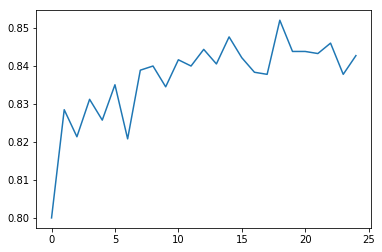

In [28]:
plt.cla()
plt.plot(trees, accuracy)

# Conclusion

To summarize, like decision trees, random forests are a type of data mining algorithm that can select from among a large number of variables. Those that are most important in determining the target or response variable to be explained. <br/>

Also light decision trees. The target variable in a random forest can be categorical or quantitative. And the group of explanatory variables or features can be categorical and quantitative in any combination. Unlike decision trees however, the results of random forests often generalize well to new data. Since the strongest signals are able to emerge through the growing of many trees. Further, small changes in the data do not impact the results of a random forest. In my opinion, the main weakness of random forests is simply that the results are less satisfying, since no trees are actually interpreted. Instead, the forest of trees is used to rank the importance of variables in predicting the target. Thus we get a sense of the most important predictive variables but not necessarily their relationships to one another. 

Random forest analysis was performed to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable. The following explanatory variables were included as possible contributors to a random forest evaluating regular smoking (my response variable), age, gender, (race/ethnicity) Hispanic, White, Black, Native American and Asian. Alcohol use, marijuana use, cocaine use, inhalant use, availability of cigarettes in the home, whether or not either parent was on public assistance, any experience with being expelled from school, alcohol problems, deviance, violence, depression, self-esteem, parental presence, parental activities, family connectedness, school connectedness and grade point average.

The explanatory variables with the highest relative importance scores were marijuana use, White ethnicity, deviance and grade point average. The accuracy of the random forest was 84%, with the subsequent growing of multiple trees rather than a single tree, adding little to the overall accuracy of the model, and suggesting that interpretation of a single decision tree may be appropriate.